In [103]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

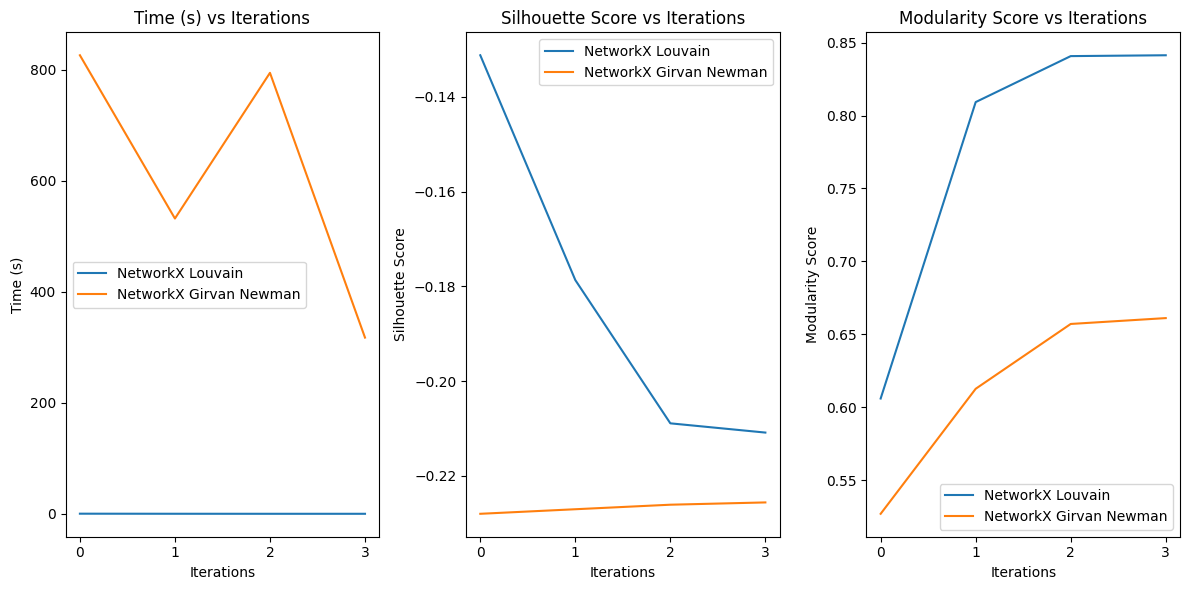

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

def eval_plots(*datasets, tick_int):

    for i, (data, label, ylabel) in enumerate(datasets):
        for d, l in zip(data, label): 
            ax[i].plot(d, label=l)
        ax[i].set_xlabel('Iterations')
        ax[i].set_ylabel(ylabel)
        ax[i].set_title(f'{ylabel} vs Iterations')
        ax[i].xaxis.set_major_locator(ticker.MultipleLocator(tick_int))
        ax[i].legend()
        
    plt.tight_layout()
    plt.show()

# read nx louvain csvs
nx_lou_times = pd.read_csv("nx_louvain_iteration_times.csv")
nx_lou_m_times = nx_lou_times.mean(axis='rows')

nx_lou_sil = pd.read_csv("nx_louvain_silhouette_scores_per_iteration.csv")
nx_lou_m_sil = nx_lou_sil.mean(axis='rows')

nx_lou_mod = pd.read_csv("nx_louvain_modularity_scores_per_iteration.csv")
nx_lou_m_mod = nx_lou_mod.mean(axis='rows')

# read nx gn csvs
nx_gn_times = pd.read_csv("nx_gn_iteration_times.csv")
nx_gn_m_times = nx_gn_times.mean(axis='rows')

nx_gn_sil = pd.read_csv("nx_gn_silhouette_scores_per_iteration.csv")
nx_gn_m_sil = nx_gn_sil.mean(axis='rows')

nx_gn_mod = pd.read_csv("nx_gn_modularity_scores_per_iteration.csv")
nx_gn_m_mod = nx_gn_mod.mean(axis='rows')

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

# Plotting with variable names as legend labels
eval_plots(((nx_lou_m_times, nx_gn_m_times[:4]), ('NetworkX Louvain', 'NetworkX Girvan Newman'), 'Time (s)'),
            ((nx_lou_m_sil, nx_gn_m_sil[:4]), ('NetworkX Louvain', 'NetworkX Girvan Newman'), 'Silhouette Score'),
            ((nx_lou_m_mod, nx_gn_m_mod[:4]), ('NetworkX Louvain', 'NetworkX Girvan Newman'), 'Modularity Score'), 
           tick_int=1)


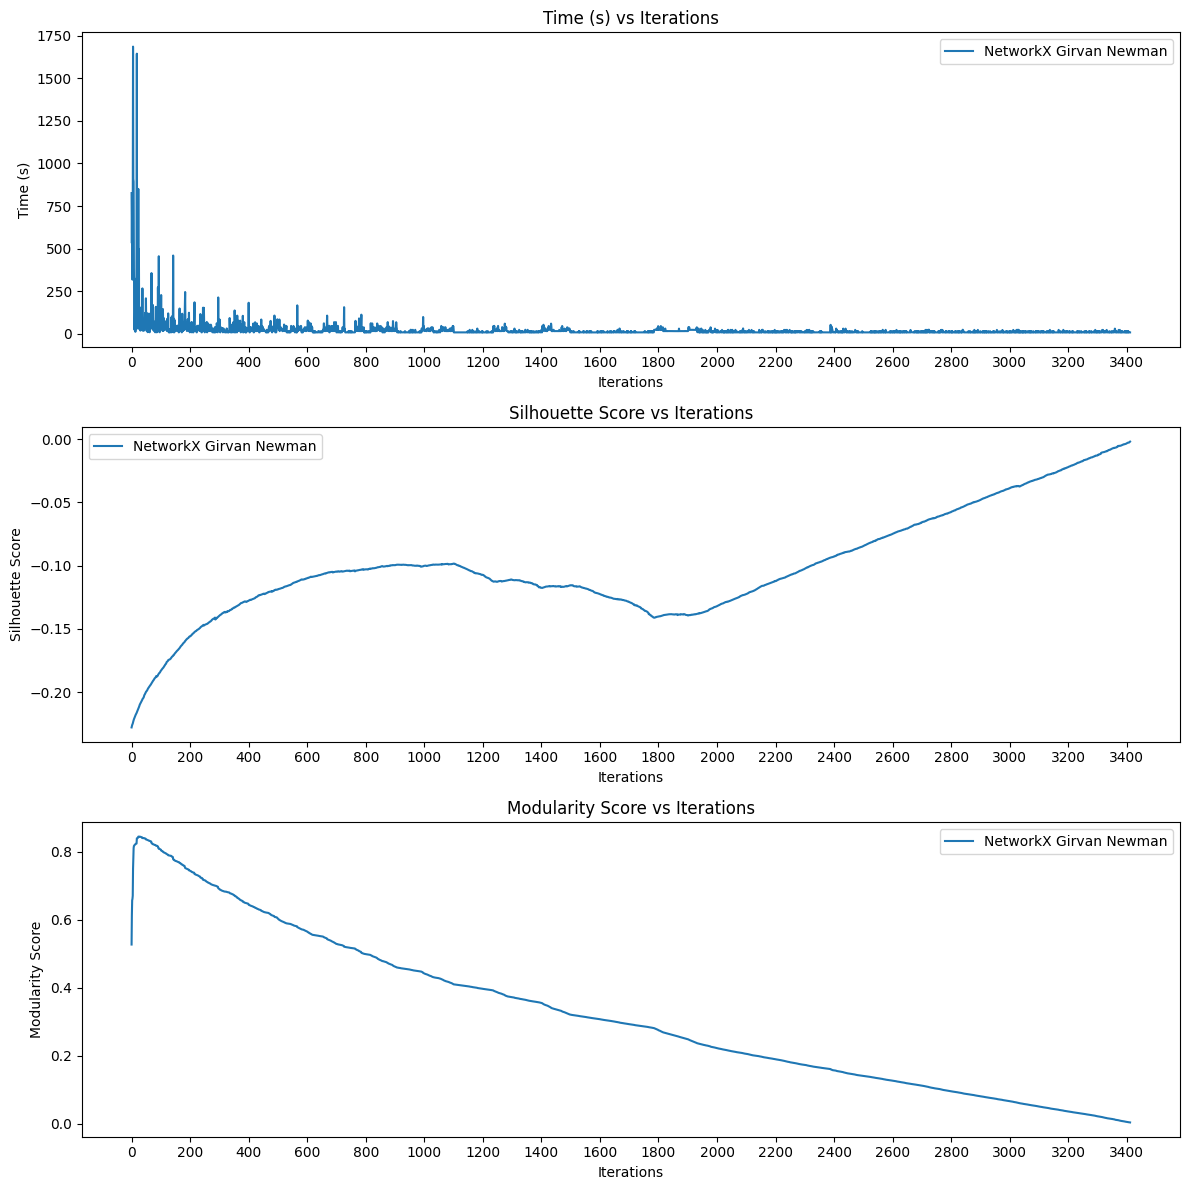

In [106]:
# Just Girvan Newman plots
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

eval_plots(((nx_gn_m_times,), ('NetworkX Girvan Newman',), 'Time (s)'),
            ((nx_gn_m_sil,), ('NetworkX Girvan Newman',), 'Silhouette Score'),
            ((nx_gn_m_mod,), ('NetworkX Girvan Newman',), 'Modularity Score'),
           tick_int=200)
